In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from joblib import load
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_scaled, X = load('../../analysis and preprocessing/clustering_preprocessed.joblib')

In [3]:
pca_check = PCA()
pca_check.fit(X_scaled)

PCA()

### Briramo broj komponenti za pca model

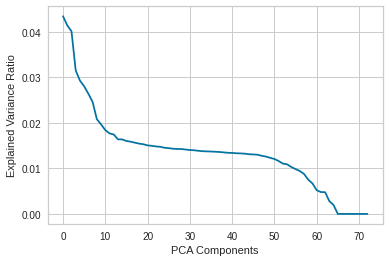

In [4]:
evr = pca_check.explained_variance_ratio_
plt.plot(evr)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [5]:
print("PC-1:", evr[0])
print("PC-2:", evr[1])

PC-1: 0.04340258231759819
PC-2: 0.041400891544146605


### Pravimo PCA model

In [6]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

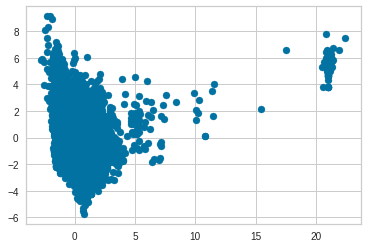

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

### Biramo optimalan broj klastera

In [8]:
sse = []
silhouettes = []
max_score = float('-inf')
best_model = None

index = range(2,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(X_pca)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    silhouettes_ = silhouette_score(X_pca, kmeans.labels_) 
    silhouettes.append(silhouettes_)
    print ("clusters: {}  sse: {}  silhouette: {}".format(i, sse_, silhouettes_))
    
    if silhouettes_ > max_score:
        max_score = silhouettes_
        best_model = kmeans

clusters: 2  sse: 51365.58776529768  silhouette: 0.8766497458482918
clusters: 3  sse: 29268.658139291972  silhouette: 0.39762619184900094
clusters: 4  sse: 19263.943855205063  silhouette: 0.4194459181899932
clusters: 5  sse: 15431.955059106947  silhouette: 0.4372773165893225
clusters: 6  sse: 12331.54384501302  silhouette: 0.398438912347042
clusters: 7  sse: 10167.232061198954  silhouette: 0.4111322471912715
clusters: 8  sse: 8525.913655480646  silhouette: 0.412140328302326
clusters: 9  sse: 7315.6067171025425  silhouette: 0.3860398080203668


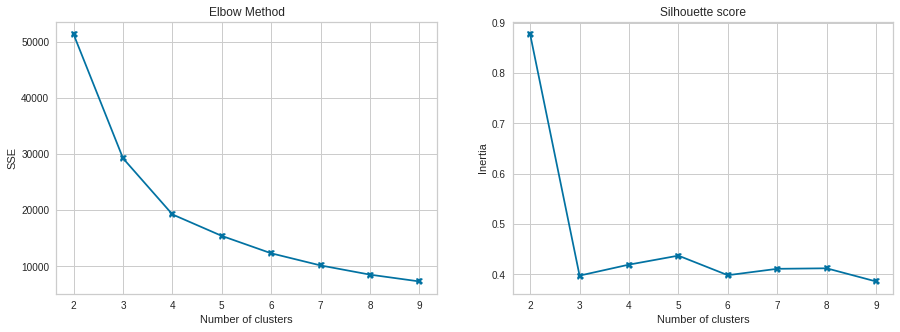

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(index, sse, marker="X")
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE')

ax2.plot(index, silhouettes, marker="X")
ax2.set_title('Silhouette score')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Inertia')
plt.show()

In [10]:
# Vidimo najbolji rezultat siluete i to ce biti optimalni broj klastera

In [11]:
optimum_k=best_model.n_clusters
print(optimum_k)

2


In [12]:
km = KMeans(n_clusters = best_model.n_clusters, random_state = 30)
m = km.fit_predict(X_pca)

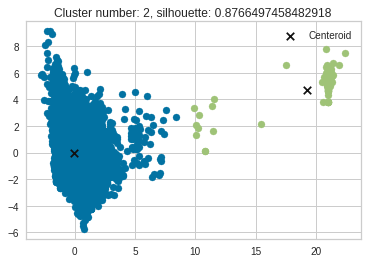

In [13]:
for i in range(optimum_k + 1):
  plt.scatter(X_pca[m == i, 0], X_pca[m == i, 1])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", s=56, c='k', label='Centeroid')

plt.title(f"Cluster number: {optimum_k}, silhouette: {silhouettes[optimum_k-2]}")
plt.legend()
plt.show()

### Prikazujemo i za ostali broj klastera

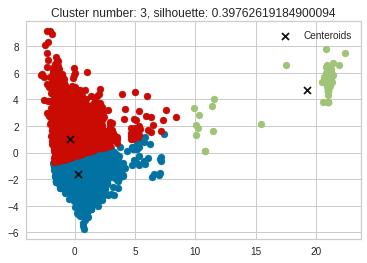

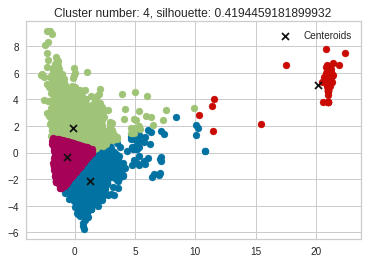

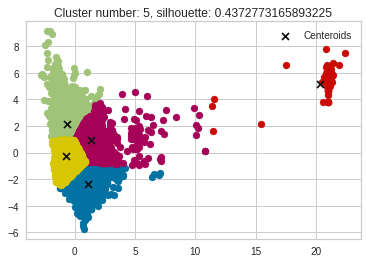

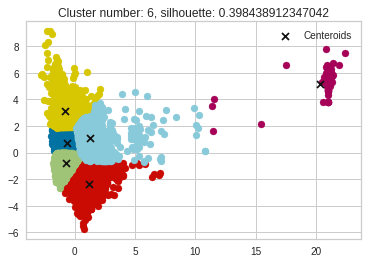

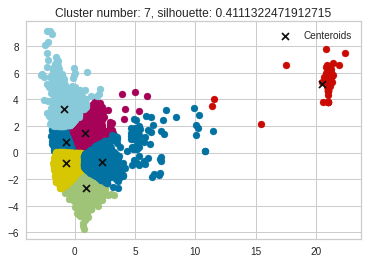

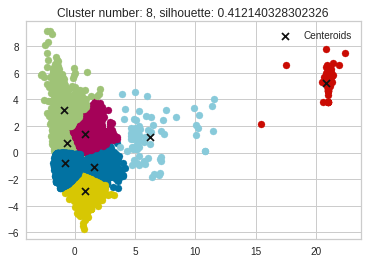

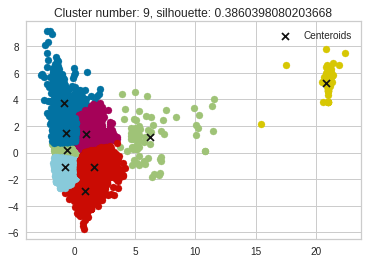

In [14]:
for k in range(2,10):
    if k==optimum_k:
        continue
        
    km = KMeans(n_clusters=k, random_state=30)
    m = km.fit_predict(X_pca)
    
    for i in range(10):
      plt.scatter(X_pca[m == i, 0], X_pca[m == i, 1])
    
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='k', marker="x", label='Centeroids')
    plt.title(f"Cluster number: {k}, silhouette: {silhouettes[k-2]}")
    plt.legend()
    plt.show()